In [1]:
# Importing all the libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path

In [2]:
# Define path to the data directory
dir_alldata = Path('../input/chest-xray-pneumonia/chest_xray/chest_xray')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_data_dir = dir_alldata / 'train'

# Path to validation directory
validation_data_dir = dir_alldata / 'val'

# Path to test directory
test_data_dir = dir_alldata / 'test'

# Get the path to the normal and pneumonia sub-directories
normal_cases_train = train_data_dir / 'NORMAL'
pneumonia_cases_train = train_data_dir / 'PNEUMONIA'

In [3]:
img_width, img_height = 150,150
nb_train_sample =1000
nb_validation_samples =100

epochs = 50
batch_size = 20

if K.image_data_format()=="channels_first":
    input_shape =(3,img_width, img_height)
else:
    input_shape =(img_width, img_height,3)

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



train_generator= train_datagen.flow_from_directory(train_data_dir, target_size =(150,150),batch_size=batch_size, class_mode="binary" )

validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size = (150,150),batch_size=batch_size, class_mode="binary")
 
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size = (150,150),batch_size=batch_size, class_mode="binary")
 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Printing three Normal random images 
NORMAL2-IM-0238-0001.jpeg
IM-0021-0001.jpeg
NORMAL2-IM-0007-0001.jpeg


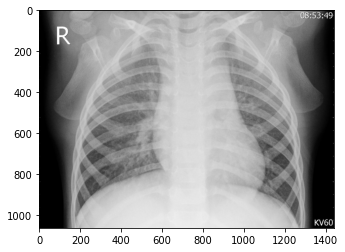

1440x1064


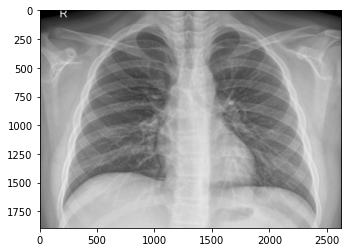

2624x1893


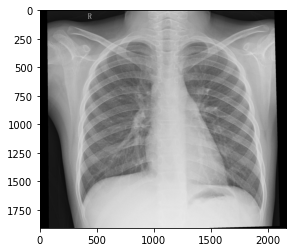

2165x1907


In [4]:
# Three Random Normal CXR Images from the dataset
import PIL 
from PIL import Image 
# Three Random Pneumonia CXR Images from the dataset
import os, random

folder=r"../input/chest-xray-pneumonia/chest_xray/test/NORMAL"

a=random.choice(os.listdir(folder))
b=random.choice(os.listdir(folder))
c=random.choice(os.listdir(folder))
print("Printing three Normal random images ")
print(a)
print(b)
print(c)

random = [a, b, c]

for i in random:
    file = folder+'/'+i
    img = image.load_img(file)
    plt.figure()
    plt.imshow(img)
    plt.show() 
    img = PIL.Image.open(file) 
  
    # fetching the dimensions 
    wid, hgt = img.size 
  
    # displaying the dimensions 
    print(str(wid) + "x" + str(hgt))

Printing three PNEUMONIA random images 
person1643_virus_2843.jpeg
person147_bacteria_705.jpeg
person127_bacteria_602.jpeg


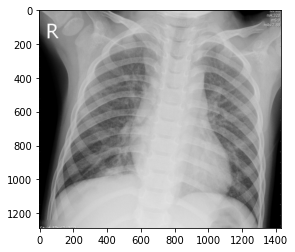

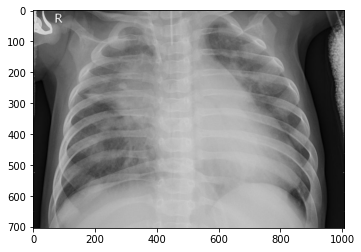

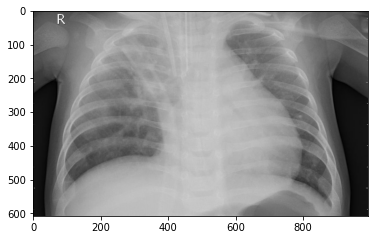

In [5]:
# Three Random Pneumonia CXR Images from the dataset
import os, random

folder=r"../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA"

d=random.choice(os.listdir(folder))
e=random.choice(os.listdir(folder))
f=random.choice(os.listdir(folder))
print("Printing three PNEUMONIA random images ")
print(d)
print(e)
print(f)

random = [d, e, f]

for i in random:
    file = folder+'/'+i
    img = image.load_img(file)
    plt.figure()
    plt.imshow(img)
    plt.show()
#     model.predict(file)

#../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Positive (0) and Negative Cases (1)')

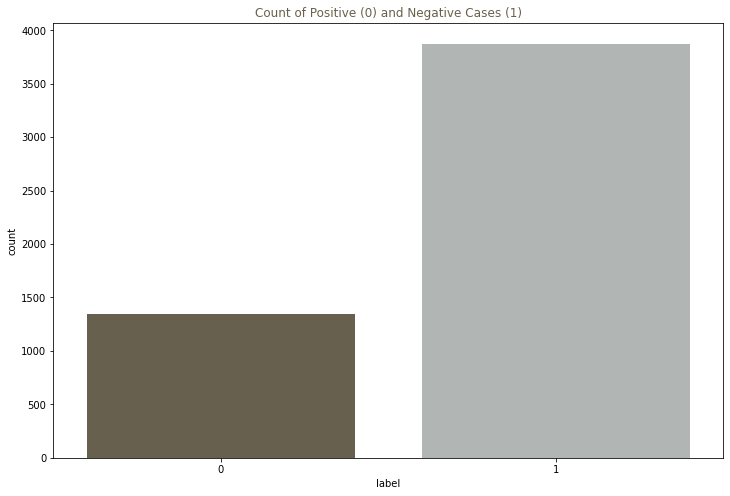

In [6]:
# To plot the count plot I am changing the dataset into a pandas dataframe
# Get the list of all the images
normal = normal_cases_train.glob('*.jpeg')
pneumonia = pneumonia_cases_train.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
train_df = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal:
    train_df.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia:
    train_df.append((img,1))

# Get a pandas dataframe from the data we have in our list 
train_df = pd.DataFrame(train_df, columns=['image', 'label'],index=None)

# Shuffle the data 
train_df = train_df.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
plt.figure(figsize=(12,8))
count = sns.countplot(train_df["label"], palette=["#6B614B","#B0B7B5"])
count.set_title("Count of Positive (0) and Negative Cases (1)", color="#6B614B")

In [7]:
# instantiating the model in the strategy scope creates the model on the TPU
# with tpu_strategy.scope():
#     model = tf.keras.Sequential( … ) # define your model normally
#     model.compile( … )
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss= "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [8]:
history = model.fit_generator(train_generator, steps_per_epoch=nb_train_sample//batch_size, epochs=epochs,
                              validation_data=validation_generator, 
                              validation_steps=nb_validation_samples//batch_size)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
50/50 [==============================] - 35s 674ms/step - loss: 0.6074 - accuracy: 0.7212 - val_loss: 0.7210 - val_accuracy: 0.5000
Epoch 2/50
50/50 [==============================] - 30s 602ms/step - loss: 0.4973 - accuracy: 0.7725
Epoch 3/50
50/50 [==============================] - 30s 600ms/step - loss: 0.3358 - accuracy: 0.8501
Epoch 4/50
50/50 [==============================] - 29s 574ms/step - loss: 0.3444 - accuracy: 0.8367
Epoch 5/50
50/50 [==============================] - 28s 553ms/step - loss: 0.3028 - accuracy: 0.8468
Epoch 6/50
50/50 [==============================] - 27s 540ms/step - loss: 0.2860 - accuracy: 0.8726
Epoch 7/50
50/50 [==============================] - 27s 535ms/step - loss: 0.2714 - accuracy: 0.8838
Epoch 8/50
50/50 [==============================] - 27s 535ms/step - loss: 0.2514 - accuracy: 0.8953
Epoch 9/50
50/50 [==============================] - 26s 520ms/step - loss: 0.2910 - accuracy: 0.8931
Epoch 10/50
50/50 [==============================

In [9]:
test_accuracy = model.evaluate_generator(test_generator)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [10]:
print('The accuracy on test set :',test_accuracy[1]*100 )

The accuracy on test set : 88.62179517745972


In [11]:
model.save('my_model')

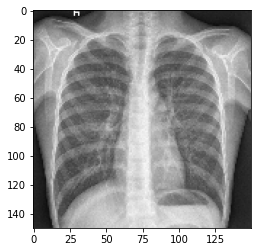

1/1 [==============================] - 0s 114ms/step


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

In [12]:
img_width, img_height = 150, 150
img = image.load_img('../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0007-0001.jpeg', target_size = (img_width, img_height))
plt.figure()
plt.imshow(img)
plt.show(img)
img = image.img_to_array(img)
img1 = np.expand_dims(img, axis = 0)

# model.predict(img)
model.predict_classes(img1,batch_size=32, verbose=1)

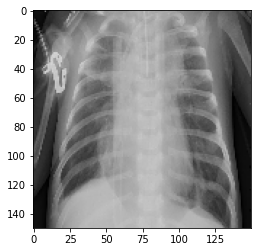

1/1 [==============================] - 0s 21ms/step


array([[1]], dtype=int32)

In [13]:
img_width, img_height = 150, 150
img = image.load_img('../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person109_bacteria_523.jpeg', target_size = (img_width, img_height))
plt.figure()
plt.imshow(img)
plt.show(img)
img = image.img_to_array(img)
img1 = np.expand_dims(img, axis = 0)

# model.predict(img)
model.predict_classes(img1,batch_size=32, verbose=1)